In [1]:
import numpy as np
import depth_calculation as dc
import matplotlib.pylab as plt
%matplotlib inline
import os.path
import sys

custom_file = open ('custom_file.txt',"rb")
path=[ line for line in custom_file ][1].decode("utf-8")
custom_file.close()
path_of_qudi = str(path)
sys.path.append(path_of_qudi)
from tools.fit_logic_standalone import FitLogic
fitting = FitLogic(path_of_qudi)

In [2]:
## give values here
# order of XY8-N
N = 1
# gyromagnetic ratio electron
gamma_e = 2.8025*1e4  # in MHz/T  (divided by 2pi)
gamma_e += 1e6        # to get Hz/T
# gyromagnetic ratio proton
gamma_p = 42.58       # in MHz/T  (divided by 2pi)
gamma_p *= 1e6        # to get Hz/T
# spin density
rho = 50              # in 1/nm^3
rho *= 1e27           # to get the spin density in 1/m^3
# vacuum permeability
mu_0 = 4*np.pi*1e-7
# Planck constant
h = 6.62607e-34

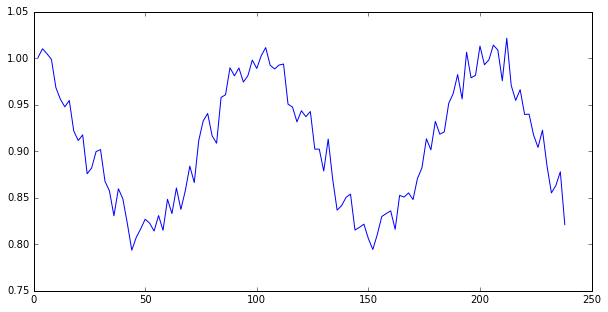

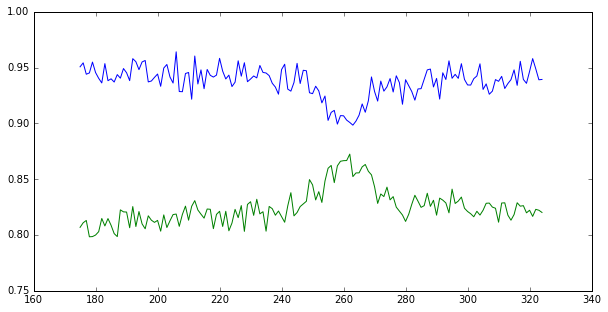

In [3]:
## Import data
rabi_file = 'D:\\Git\\DepthCalculations\\Rabi_old.asc'
xy8_file = 'D:\\Git\\DepthCalculations\\XY8-8_old.asc'

rabi_x, rabi_y = dc.get_data(rabi_file, data_columns=2)
xy8_x, xy8_y1, xy8_y2 = dc.get_data(xy8_file, data_columns=3)

plt.plot(rabi_x, rabi_y)
plt.show()

plt.plot(xy8_x, xy8_y1)
plt.plot(xy8_x, xy8_y2)
plt.show()

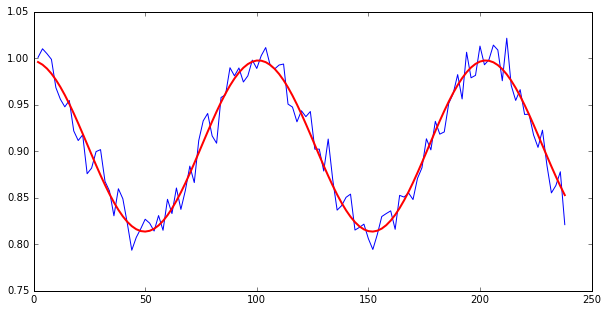

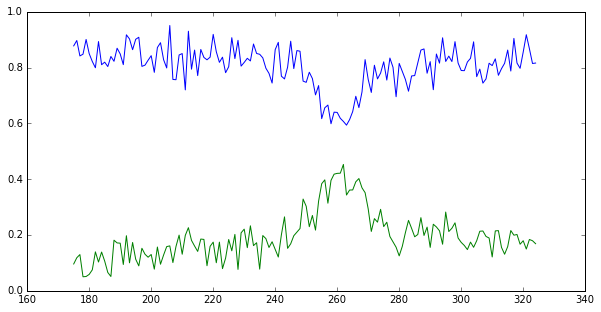

In [5]:
## perform Rabi fit and do normalization of the xy8 data
# Rabi fit
rabi_fit_result=fitting.make_sine_fit(axis=rabi_x,data=rabi_y)
rabi_offset = rabi_fit_result.params['offset'].value
rabi_amplitude = rabi_fit_result.params['amplitude'].value
plt.plot(rabi_x, rabi_y)
plt.plot(rabi_x,rabi_fit_result.best_fit,linewidth=2.,color="r")
plt.show()
# do XY8 normalisation
level = ((np.array(xy8_y1)+np.array(xy8_y2))/2).mean()
xy8_y1_norm = dc.do_normalisation(xy8_y1, rabi_amplitude, level)
xy8_y2_norm = dc.do_normalisation(xy8_y2, rabi_amplitude, level)
plt.plot(xy8_x, xy8_y1_norm)
plt.plot(xy8_x, xy8_y2_norm)
plt.show()

In [ ]:
## calculate noise density spectrum

In [ ]:
## perform fit to the noise density spectrum and calculate the depth